In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize, LogNorm, ListedColormap
import seaborn as sns

plt.rcParams['font.size'] = '12'

fontsize = 14

fig_dir = 'figs/'

In [26]:
### read in metric data
dvs = [1,1,1,2,2,2,   1,1,1,2,2,2,   1,1,1,2,2,2]
seeds = [0,1,2,0,1,2,  0,1,2,0,1,2,  0,1,2,0,1,2]
rounds = [1,1,1,1,1,1,  2,2,2,2,2,2,  3,3,3,3,3,3]
nfes = [21500,21600,21300,20300,20300,19800,  \
       63801, 67801, 63601, 58301, 59601, 58601,  \
       106202, 108502, 104702, 96902, 98802, 114202]

In [27]:
### read in operators data
operators = []
for i in range(len(dvs)):
    dv = dvs[i]
    seed = seeds[i]
    r = rounds[i]
    nfe = nfes[i]
    df = pd.read_csv(f'../../results/MOO_results_s2/dv{dv}_seed{seed}_round{r}/operators/dv{dv}_s{seed}_nfe{nfe}.NFE', sep=' ', header=None)
    for o in ['DE','PCX','SBX','SPX','UM','UNDX']:
        df[o] = pd.read_csv(f'../../results/MOO_results_s2/dv{dv}_seed{seed}_round{r}/operators/dv{dv}_s{seed}_nfe{nfe}.{o}', sep=' ', header=None)[0].values
    df.index = df[0]
    df = df.iloc[:, 1:]
    ncols = df.shape[1]
    cols = df.columns
    operators.append(df)

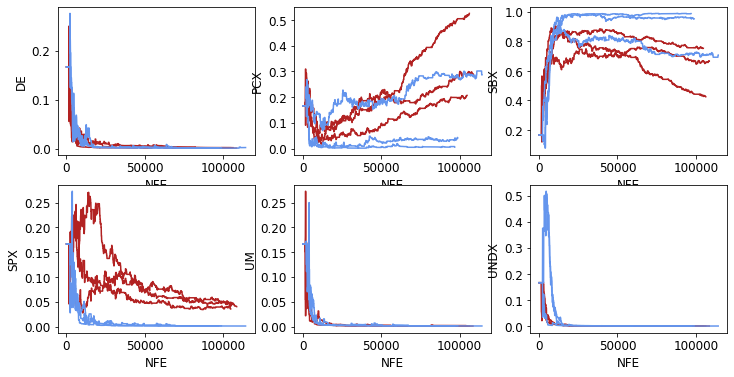

In [28]:
### plot operators
coldict = {1: 'firebrick', 2: 'cornflowerblue'}

fig, axs = plt.subplots(2,3,figsize=(12,6))
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    for i in range(len(dvs)):
        ax.plot(operators[i].iloc[:, c], color=coldict[dvs[i]])
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    j += 1
    if j == 3:
        j = 0
        k += 1


In [29]:
metrics = []
for i in range(len(dvs)):
    dv = dvs[i]
    seed = seeds[i]
    r = rounds[i]
    nfe = nfes[i]
    df = pd.read_csv(f'../../results/MOO_results_s2/dv{dv}_seed{seed}_round{r}/metrics/dv{dv}_s{seed}_nfe{nfe}.metrics', sep=' ')
    df.index = operators[i].index[-df.shape[0]:]
    df.columns = ['Hypervolume', 'Generational distance', 'Inverted generational distance', 'Spacing', 'Epsilon indicator', 'Maximum Pareto front error']
#     df = df.iloc[:, [0, 1, 4]]
    ncols = df.shape[1]
    cols = df.columns
    metrics.append(df)

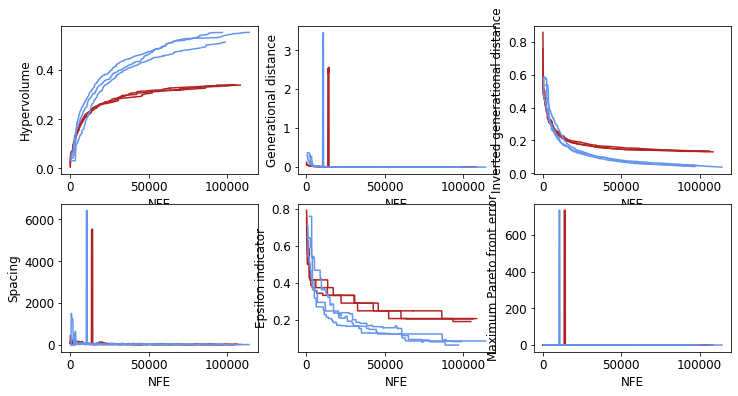

In [30]:
### plot runtime metrics
coldict = {1: 'firebrick', 2: 'cornflowerblue'}

fig, axs = plt.subplots(2,3,figsize=(12,6))
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    for i in range(len(dvs)):
        ax.plot(metrics[i].iloc[:, c], color=coldict[dvs[i]])
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    j += 1
    if j == 3:
        j = 0
        k += 1
    

In [31]:
metrics[0]

,Hypervolume,Generational distance,Inverted generational distance,Spacing,Epsilon indicator,Maximum Pareto front error
0,,,,,,
100,0.004717,0.129393,0.859665,449.982515,0.791667,0.564224
200,0.030099,0.052654,0.627804,69.994805,0.708333,0.291236
300,0.032251,0.049712,0.627051,125.446649,0.708333,0.396286
400,0.049398,0.059971,0.555117,88.680168,0.604388,0.409796
500,0.063432,0.053543,0.462173,39.222756,0.541667,0.409796
...,...,...,...,...,...,...
21100,0.261982,0.006200,0.194070,46.463938,0.333333,0.374727
21200,0.263021,0.006143,0.192951,68.018611,0.333333,0.374727
21300,0.263102,0.006112,0.192890,67.643486,0.333333,0.374727


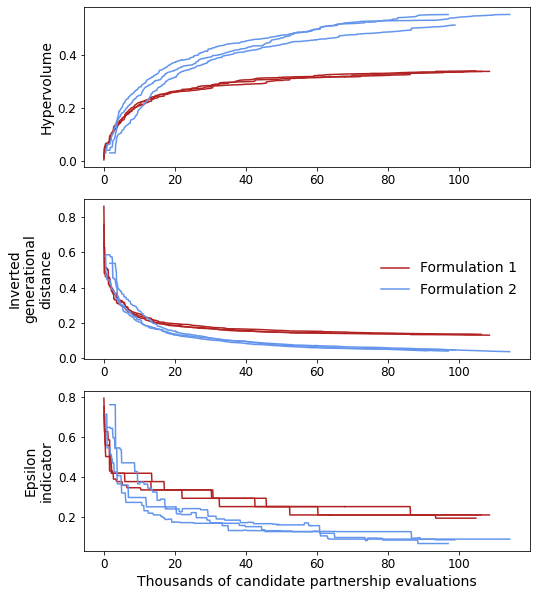

In [47]:
from matplotlib.lines import Line2D
### plot runtime metrics
coldict = {1: 'firebrick', 2: 'cornflowerblue'}
cols = ['Hypervolume', 'Inverted generational distance','Epsilon indicator']
labels = ['Hypervolume', 'Inverted\ngenerational\ndistance','Epsilon\nindicator']
fig, axs = plt.subplots(3,1,figsize=(8,10))
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[c]
    for i in range(len(dvs)):
        ax.plot(metrics[i][col].index/1000, metrics[i][col], color=coldict[dvs[i]])
    ax.set_ylabel(labels[c], fontsize=fontsize)
    if c == 1:
        leg = [Line2D([0], [0], color= coldict[1], label='Formulation 1'),
               Line2D([0], [0], color= coldict[2], label='Formulation 2')]
        _ = ax.legend(handles=leg, loc='center right', frameon=False, fontsize=fontsize)
ax.set_xlabel('Thousands of candidate partnership evaluations', fontsize=fontsize)

plt.savefig(f'{fig_dir}moea_metrics.png', bbox_inches='tight', dpi=300)


In [38]:
### get total number of FE across seeds
ndv=0
for i in range(len(dvs)-6, len(dvs)):
    print(metrics[i][col].index[-1])
    ndv+=metrics[i][col].index[-1]
print('total: ',ndv)

106202
108502
104702
96902
98802
114202
total:  629312


In [7]:
### read in objectives
objs = []
for i in range(len(dvs)):
    dv = dvs[i]
    seed = seeds[i]
    r = rounds[i]
    nfe = nfes[i]
    df = pd.read_csv(f'../results/MOO_results_s2/overall_ref/dv{dv}_s{seed}_nfe{nfe}.reference', sep=' ', header=None)
    df.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    ncols = df.shape[1]
    cols = df.columns
    objs.append(df)

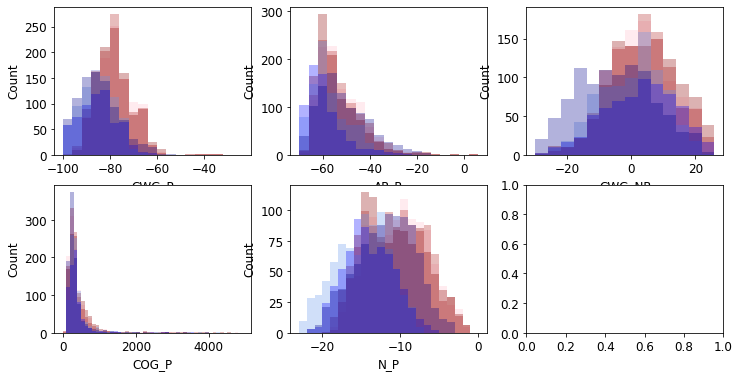

In [8]:
coldict = {0: 'pink', 1: 'firebrick', 2:'darkred', 3:'cornflowerblue',4:'blue',5:'darkblue'}
objbindict = {'CWG_P':np.arange(-100,-20,4),'AP_P':np.arange(-70,10,4),'CWG_NP':np.arange(-30,30,4),'COG_P':np.arange(0,5000,100),'N_P':np.arange(-23,1,1)}
### plot hypervolume

fig, axs = plt.subplots(2,3,figsize=(12,6))
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    for i in range(len(dvs)-6, len(dvs)):
        ax.hist(objs[i].iloc[:, c], color=coldict[i % 6], alpha=0.3, bins=objbindict[col])
    ax.set_ylabel('Count')
    ax.set_xlabel(col)
    j += 1
    if j == 3:
        j = 0
        k += 1


(1291, 5)


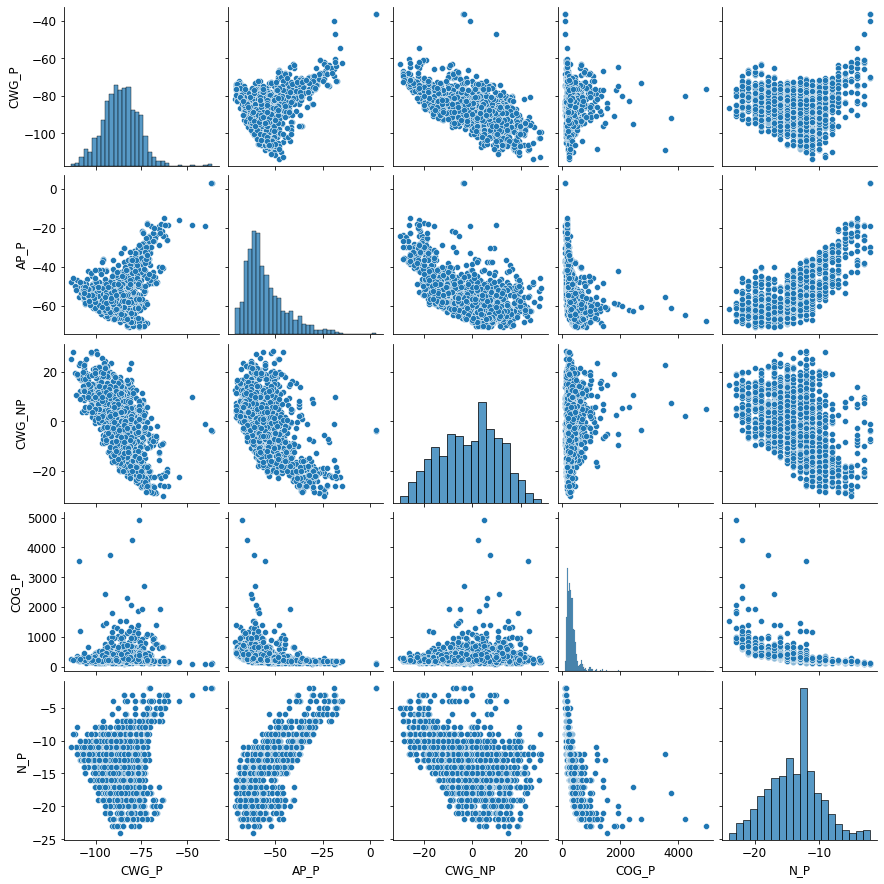

In [9]:
### look at overall ref set objs
refset = pd.read_csv(f'../results/MOO_results_s2/overall_ref/overall.reference', sep=' ', header=None)
refset.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
ncols = refset.shape[1]
cols = refset.columns
print(refset.shape)
sns.pairplot(refset)

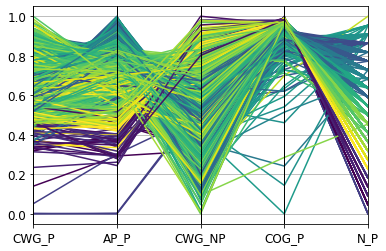

In [10]:
for c in refset.columns:
    refset[c] = (refset[c].max() - refset[c]) / (refset[c].max() - refset[c].min())
refset['class'] = refset['N_P']
fig, ax = plt.subplots(1)
pd.plotting.parallel_coordinates(refset, class_column='class', colormap='viridis', ax=ax)
ax.get_legend().remove()

(115, 5)


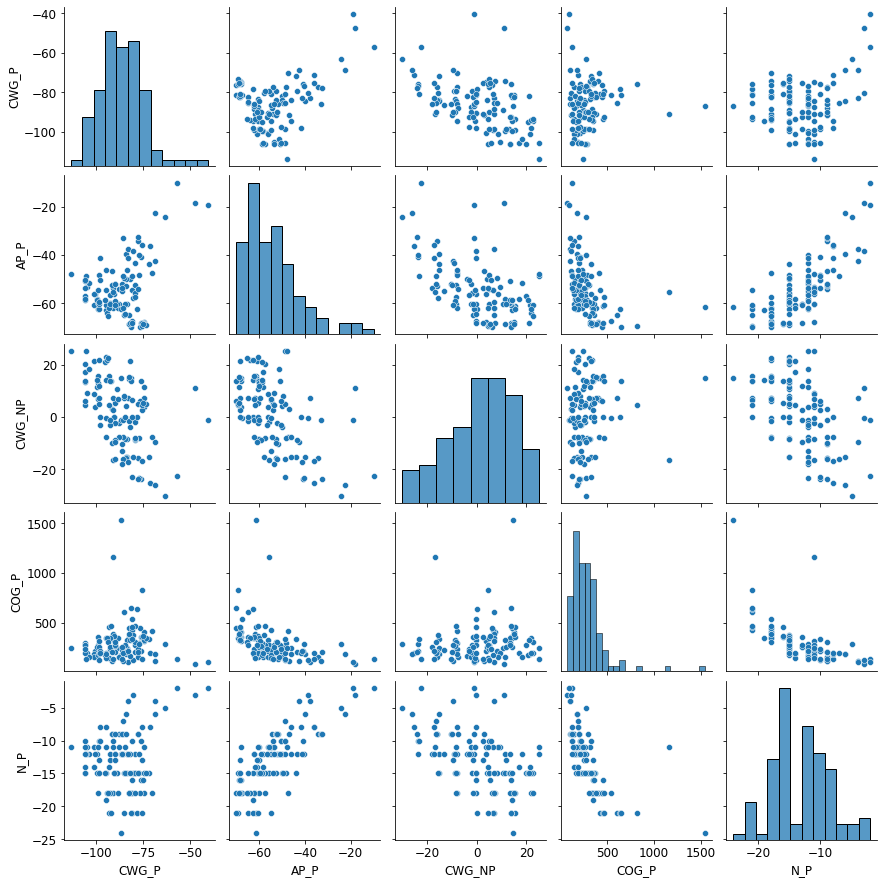

In [11]:
### look at overall ref set objs, coarser grid
refset = pd.read_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse.reference', sep=' ', header=None)
refset.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
ncols = refset.shape[1]
cols = refset.columns
print(refset.shape)
sns.pairplot(refset)

refset['group'] = refset['N_P']
refset.to_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse_clean.reference', index=False)


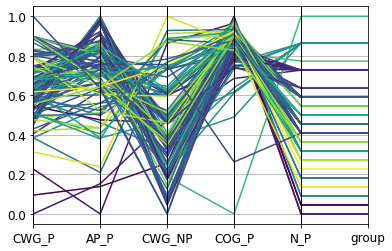

In [12]:
for c in refset.columns:
    refset[c] = (refset[c].max() - refset[c]) / (refset[c].max() - refset[c].min())
refset['class'] = refset['N_P']
fig, ax = plt.subplots(1)
pd.plotting.parallel_coordinates(refset, class_column='class', colormap='viridis', ax=ax)
ax.get_legend().remove()

(108, 5)


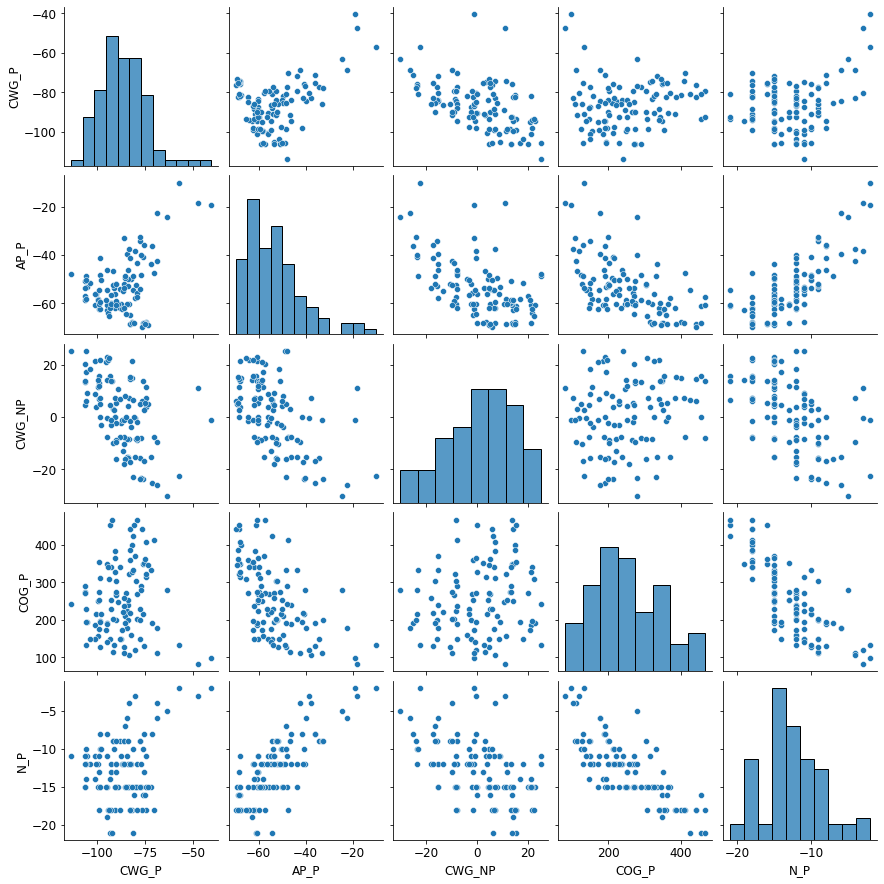

In [13]:
### look at overall ref set objs, coarser grid, + brush
refset = pd.read_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse.reference', sep=' ', header=None)
refset.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
ncols = refset.shape[1]
cols = refset.columns

refset = refset.loc[refset['COG_P'] < 500.]
print(refset.shape)
sns.pairplot(refset)

refset['group'] = refset['N_P']
refset.to_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse_filt_clean.reference', index=False)


In [ ]:
for c in refset.columns:
    refset[c] = (refset[c].max() - refset[c]) / (refset[c].max() - refset[c].min())
refset['class'] = refset['N_P']
fig, ax = plt.subplots(1)
pd.plotting.parallel_coordinates(refset, class_column='class', colormap='viridis', ax=ax)
ax.get_legend().remove()

In [ ]:
### look at evolution of ref set
### dv1_seed0 -> start with round 1
dv = 2
filename = '../results/MOO_results_s2/dv1_seed0_round1/objs/dv1_s0_nfe21500.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
set_dict = {}
for bi in [200]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100
    s['NFE'] = nfe
    df = s.copy()

### dv1_seed0 -> now add round 2
dv = 2
filename = '../results/MOO_results_s2/dv1_seed0_round2/objs/dv1_s0_nfe63801.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [185, 385]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 21501
    s['NFE'] = nfe
    df = df.append(s)
    
### dv1_seed0 -> now add round 3
dv = 2
filename = '../results/MOO_results_s2/dv1_seed0_round3/objs/dv1_s0_nfe106202.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [162, 362]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 63802
    s['NFE'] = nfe
    df = df.append(s)
    
df.reset_index(drop=True, inplace=True)

g = sns.pairplot(df, hue='NFE', palette='viridis', plot_kws={'alpha':0.3})


In [ ]:
### look at evolution of ref set
### dv1_seed1 -> start with round 1
dv = 2
filename = '../results/MOO_results_s2/dv1_seed1_round1/objs/dv1_s1_nfe21600.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
set_dict = {}
for bi in [200]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100
    s['NFE'] = nfe
    df = s.copy()

### dv1_seed1 -> now add round 2
dv = 2
filename = '../results/MOO_results_s2/dv1_seed1_round2/objs/dv1_s1_nfe67801.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [184, 384]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 21601
    s['NFE'] = nfe
    df = df.append(s)
    
### dv1_seed1 -> now add round 3
dv = 2
filename = '../results/MOO_results_s2/dv1_seed1_round3/objs/dv1_s1_nfe108502.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [158, 358]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 67802
    s['NFE'] = nfe
    df = df.append(s)
    
df.reset_index(drop=True, inplace=True)

g = sns.pairplot(df, hue='NFE', palette='viridis', plot_kws={'alpha':0.3})


In [ ]:
### look at evolution of ref set
### dv1_seed2 -> start with round 1
dv = 2
filename = '../results/MOO_results_s2/dv1_seed2_round1/objs/dv1_s2_nfe21300.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
set_dict = {}
for bi in [200]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100
    s['NFE'] = nfe
    df = s.copy()

### dv1_seed2 -> now add round 2
dv = 2
filename = '../results/MOO_results_s2/dv1_seed2_round2/objs/dv1_s2_nfe63601.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [187, 387]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 21301
    s['NFE'] = nfe
    df = df.append(s)
    
### dv1_seed2 -> now add round 3
dv = 2
filename = '../results/MOO_results_s2/dv1_seed2_round3/objs/dv1_s2_nfe104702.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [164, 364]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 63602
    s['NFE'] = nfe
    df = df.append(s)
    
df.reset_index(drop=True, inplace=True)

g = sns.pairplot(df, hue='NFE', palette='viridis', plot_kws={'alpha':0.3})


In [ ]:
### look at evolution of ref set
### dv2_seed0 -> start with round 1
dv = 2
filename = '../results/MOO_results_s2/dv2_seed0_round1/objs/dv2_s0_nfe20300.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
set_dict = {}
for bi in [200]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100
    s['NFE'] = nfe
    df = s.copy()

### dv2_seed0 -> now add round 2
dv = 2
filename = '../results/MOO_results_s2/dv2_seed0_round2/objs/dv2_s0_nfe58301.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [197]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 20301
    s['NFE'] = nfe
    df = df.append(s)
    
### dv1_seed0 -> now add round 3
dv = 2
filename = '../results/MOO_results_s2/dv2_seed0_round3/objs/dv2_s0_nfe96902.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [17, 217, 386]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 58302
    s['NFE'] = nfe
    df = df.append(s)
    
df.reset_index(drop=True, inplace=True)

g = sns.pairplot(df, hue='NFE', palette='viridis', plot_kws={'alpha':0.3})


In [ ]:
### look at evolution of ref set
### dv2_seed1 -> start with round 1
dv = 2
filename = '../results/MOO_results_s2/dv2_seed1_round1/objs/dv2_s1_nfe20300.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
set_dict = {}
for bi in [200]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100
    s['NFE'] = nfe
    df = s.copy()

### dv2_seed1 -> now add round 2
dv = 2
filename = '../results/MOO_results_s2/dv2_seed1_round2/objs/dv2_s1_nfe59601.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [197]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 20301
    s['NFE'] = nfe
    df = df.append(s)
    
### dv1_seed1 -> now add round 3
dv = 2
filename = '../results/MOO_results_s2/dv2_seed1_round3/objs/dv2_s1_nfe98802.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [4, 204, 392]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 59602
    s['NFE'] = nfe
    df = df.append(s)
    
df.reset_index(drop=True, inplace=True)

g = sns.pairplot(df, hue='NFE', palette='viridis', plot_kws={'alpha':0.3})


In [ ]:
### look at evolution of ref set
### dv2_seed2 -> start with round 1
dv = 2
filename = '../results/MOO_results_s2/dv2_seed2_round1/objs/dv2_s2_nfe19800.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
set_dict = {}
for bi in [197]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100
    s['NFE'] = nfe
    df = s.copy()

### dv2_seed2 -> now add round 2
dv = 2
filename = '../results/MOO_results_s2/dv2_seed2_round2/objs/dv2_s2_nfe58601.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [202]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 19801
    s['NFE'] = nfe
    df = df.append(s)
    
### dv1_seed2 -> now add round 3
dv = 2
filename = '../results/MOO_results_s2/dv2_seed2_round3/objs/dv2_s2_nfe114202.obj'
count = 0
breaks = []
with open(filename) as f:
    for num, line in enumerate(f, 0):
        if '#' in line:
            breaks.append(count)
        count += 1
        
for bi in [14, 214, 414, 536]:
    s = pd.read_csv(filename, sep=' ', header=None, skiprows=(breaks[bi-1] + 1), skipfooter=(breaks[-1] - breaks[bi] + 1))
    s.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
    nfe = bi * 100 + 58602
    s['NFE'] = nfe
    df = df.append(s)
    
df.reset_index(drop=True, inplace=True)

g = sns.pairplot(df, hue='NFE', palette='viridis', plot_kws={'alpha':0.3})


In [14]:
### look at overall ref set objs
refset = pd.read_csv(f'../results/MOO_results_s2/overall_ref/overall.reference', sep=' ', header=None)
refset.columns = ['CWG_P','AP_P','CWG_NP','COG_P','N_P']
refset

,CWG_P,AP_P,CWG_NP,COG_P,N_P
0,-61.233116,-26.114008,-19.473816,134.322097,-3
1,-62.637031,-23.874626,-22.048183,124.853610,-3
2,-47.291832,-18.432583,9.798579,82.230965,-3
3,-65.524800,-18.961028,-15.789892,129.072468,-3
4,-87.870215,-42.603469,9.454899,106.957975,-5
...,...,...,...,...,...
1286,-72.170969,-18.009387,-18.457087,169.686774,-5
1287,-88.911836,-54.123601,-12.156254,213.212735,-10
1288,-81.046848,-48.546828,-23.006489,332.577200,-10
1289,-82.536603,-58.084491,-12.545461,263.838910,-12


In [15]:
# ### filter by metrics from EF paper (though timeline & other things are different)
# refset_filt = refset.loc[np.logical_and(np.logical_and(refset['CWG_P'] < -55, refset['CWG_NP'] < 0), refset['COG_P'] < 200),:]
# # refset_filt = refset.loc[np.logical_and( refset['CWG_NP'] < 0, refset['COG_P'] < 200),:]
# # refset_filt = refset.loc[refset['COG_P'] < 200,:]

# refset_filt.reset_index(drop=True, inplace=True)
# print(refset_filt)

# g = sns.pairplot(refset_filt, plot_kws={'alpha':0.3})


In [4]:
### match refsets to original DVs, separate by formulation. use coarse pareto set for now
reffile = '../results/MOO_results_s2/overall_ref/overall.reference'
checkptfiles = ['../results/MOO_results_s2/dv2_seed0_round3/checkpts/s0_nfe96902.checkpt',
                '../results/MOO_results_s2/dv2_seed1_round3/checkpts/s1_nfe98802.checkpt',
                '../results/MOO_results_s2/dv2_seed2_round3/checkpts/s2_nfe114202.checkpt',
                '../results/MOO_results_s2/dv1_seed0_round3/checkpts/s0_nfe106202.checkpt',
                '../results/MOO_results_s2/dv1_seed1_round3/checkpts/s1_nfe108502.checkpt',
                '../results/MOO_results_s2/dv1_seed2_round3/checkpts/s2_nfe104702.checkpt']
dvs = [2,2,2,1,1,1]
seeds = [0,1,2,0,1,2]

solns = []
with open(reffile) as rf:
    for numr, liner in enumerate(rf, 0):
        liner = [round(float(s), 6) for s in liner.split()]
        if abs(sum(liner)) > 0.1:
            found_line = False
            for checkptfile, dv, seed in zip(checkptfiles, dvs, seeds):
                if not found_line:
                    isarx = False
                    with open(checkptfile) as cf:
                        for numc, linec in enumerate(cf, 0):
                            if 'Number of Improvements' in linec:
                                isarx = False
                            if isarx:
                                linec = [round(float(s), 6) for s in linec.split()]
                                if sum([x in linec for x in liner]) == 5:
                                    solns.append([dv, seed] + linec)
                                    found_line = True
                            if 'Archive:' in linec:
                                isarx = True
print(solns)


[[1, 0, 3.290328, 3.720469, 0.635228, 0.248023, 0.256719, 0.655613, 0.498412, 0.66245, 0.039688, 0.450189, 1.0, 0.630715, 0.364199, 0.329472, 0.083024, 0.361681, 0.665943, 0.199383, 0.777647, 0.366161, 0.991568, 0.126036, 1.0, 0.482834, 0.534428, 0.605987, 0.386055, 0.417006, 0.343747, 0.414455, 0.532083, 0.030453, 0.236158, 0.055629, 0.006133, 0.034936, 0.577626, 0.203755, 0.279851, 0.240242, 0.376248, 0.314999, -61.233116, -26.114008, -19.473816, 134.322097, -3.0, 0.0, 0.0, 2.0], [1, 0, 3.454517, 3.979107, 0.563462, 0.549949, 0.327655, 0.637772, 0.562768, 0.193391, 0.527961, 0.618654, 0.675598, 0.338814, 0.394781, 0.367351, 0.2024, 0.605734, 0.347809, 0.597823, 0.666808, 0.442134, 0.725335, 0.25898, 1.0, 0.402973, 0.137557, 0.162707, 0.407238, 0.353856, 0.453265, 0.407666, 0.386934, 0.135068, 0.280373, 0.28475, 0.318307, 0.583707, 0.297281, 0.214114, 0.606337, 0.209104, 0.328171, 0.386184, -62.637031, -23.874626, -22.048183, 124.85361, -3.0, 0.0, 0.0, 2.0], [1, 0, 2.624028, 3.656641,

In [5]:
# ### create dataframe with both types of dv formulation
cols_dv1 = ['dv', 'seed', 'project'] + ['dv1_' + str(i) for i in range(41)] + ['obj_' + str(i) for i in range(5)] + ['con1','con2','unknown']
cols_dv2 = ['dv', 'seed', 'project'] + ['dv2_' + str(i) for i in range(80)] + ['obj_' + str(i) for i in range(5)] + ['con1','con2','unknown']
cols_overall = ['dv', 'seed', 'project'] + ['dv1_' + str(i) for i in range(41)] + ['dv2_' + str(i) for i in range(80)] + ['obj_' + str(i) for i in range(5)] + ['con1','con2','unknown']

df = pd.DataFrame(columns = cols_overall)

for soln in solns:
    if soln[0] == 1:
        dfsingle = pd.DataFrame({cols_dv1[i]:[soln[i]] for i in range(len(soln))})
        df = df.append(dfsingle)
    else:
        dfsingle = pd.DataFrame({cols_dv2[i]:[soln[i]] for i in range(len(soln))})
        df = df.append(dfsingle)        
        
df['project'] = [int(v - 1e-13) for v in df['project']]
df

,dv,seed,project,dv1_0,dv1_1,dv1_2,dv1_3,dv1_4,dv1_5,dv1_6,...,dv2_78,dv2_79,obj_0,obj_1,obj_2,obj_3,obj_4,con1,con2,unknown
0,1,0,3,3.720469,0.635228,0.248023,0.256719,0.655613,0.498412,0.662450,...,NaN,NaN,-61.233116,-26.114008,-19.473816,134.322097,-3.0,0.0,0.0,2.0
0,1,0,3,3.979107,0.563462,0.549949,0.327655,0.637772,0.562768,0.193391,...,NaN,NaN,-62.637031,-23.874626,-22.048183,124.853610,-3.0,0.0,0.0,2.0
0,1,0,2,3.656641,0.910127,0.165652,0.465828,0.877576,0.000000,0.402217,...,NaN,NaN,-47.291832,-18.432583,9.798579,82.230965,-3.0,0.0,0.0,2.0
0,1,0,3,3.969584,0.661294,0.130873,0.186379,0.723164,0.520569,0.689606,...,NaN,NaN,-65.524800,-18.961028,-15.789892,129.072468,-3.0,0.0,0.0,2.0
0,1,0,3,5.584316,0.443306,0.182003,0.400357,0.705340,0.507536,0.429100,...,NaN,NaN,-87.870215,-42.603469,9.454899,106.957975,-5.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954295,0.248074,-72.170969,-18.009387,-18.457087,169.686774,-5.0,0.0,0.0,0.0
0,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.922004,0.220820,-88.911836,-54.123601,-12.156254,213.212735,-10.0,0.0,0.0,0.0
0,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.863147,0.063890,-81.046848,-48.546828,-23.006489,332.577200,-10.0,0.0,0.0,0.0
0,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.977280,0.513658,-82.536603,-58.084491,-12.545461,263.838910,-12.0,0.0,0.0,2.0


In [ ]:
# print('distribution of project type in pareto set:')
# print({v: (df['project'] == v).sum() for v in set(df['project'])})

# print('distribution of dv formulation in pareto set:')
# print({v: (df['dv'] == v).sum() for v in set(df['dv'])})


In [6]:
### get district shares based on formulation
districts = ["FRS","COF","TUL","KWD","EXE","LDS", "LND","PRT","LWT","TPD","SAU","TBA","PIX","DLE","KRT","SSJ",\
             "SFW","NKN","ARV", "DLR","ID4","SMI","TJC","BLR","LHL","BDM","WRM","COB","BVA","CWO","HML",\
             "KND","RRB","CNS","ALT","CWC","MAD","SOC","SOB","CCA"]
print(len(districts))

40


In [7]:
cols = ['dv', 'seed', 'project'] + ['share_' + str(d) for d in districts] + ['obj' + str(i) for i in range(5)]
min_share = 0.01


df = pd.DataFrame(columns = cols)

for soln in solns:
    ### "project" should be <4, but rounding seems to have made some == 4. subtract small amount. then take floor to get discrete.
    if soln[2] >= 4.0:
        soln[2] = 3.0 - 1e-13
    soln[2] = int(soln[2])
    ### dv_formulation == 1: set number of partners P, and district shares. Set all except largest P to 0
    if soln[0] == 1:
        ### get number of partners & shares
        npartners = int(soln[3])
        shares = np.array(soln[4:-8])
        # get indices of npartners largest shares
        partners = np.argpartition(shares, -npartners)[-npartners:]
        nonpartners = np.argpartition(shares, -npartners)[:-npartners]
        shares[nonpartners] = 0.
    ### dv_formulation == 2: for each district, have binary switch turning on/off, as well as share.        
    else:
        ndistricts = 40
        ### get switch. This will be in [0.0, 2.0).
        switches = np.array(soln[3:ndistricts+3])
        ### get shares
        shares = np.array(soln[ndistricts+3:-8])
        ### Only districts with switch >=1 should have non-zero shares.
        shares[switches < 1.] = 0.
    ### for all dv_formulations, normalize shares to sum to 1, then set all districts below min_share to 0, then renormalize.
    shares = shares / shares.sum()
    loop = 0
    while (loop < 5) and (np.any(np.logical_and(shares < min_share, shares > 0))):
        shares[shares < min_share] = 0.
        shares /= shares.sum()
        loop += 1
    
    ### append solution
    soln_updated = soln[:3] + list(shares) + soln[-8:-3]
    dfsingle = pd.DataFrame({cols[i]:[soln_updated[i]] for i in range(len(soln_updated))})
    df = df.append(dfsingle)

In [8]:
# ### filter out solns with costs > $500
# df = df.loc[df['obj3'] <= 500, :].reset_index(drop=True)
# df

In [9]:
### now add solutions from EF paper for reevaluation
alt3 = pd.DataFrame({'share_ID4':0.3632764114896976, 'share_LWT':0.3381612256546455, 'share_PIX':0.2985623628556568}, index=[0])
alt3['project'] = 3
alt8 = pd.DataFrame({'share_'+k:v for k,v in zip(['LHL', 'KRT', 'OTL', 'KND', 'SOC', 'NKN', 'ARV', 'TUL'], [0.2042886185766813, 0.1794291485898997, 0.1492737685922382, 0.1427780807519122, 0.1230885688261011, 0.0897598541362769, 0.0890444390183038, 0.0223375215085865])}, index=[0])
alt8['project'] = 3
friant16 = pd.DataFrame({'share_'+k:v for k,v in zip(['ARV', 'LWT', 'DLE', 'SSJ', 'OFK', 'TUL', 'SFW', 'COF', 'LND', 'SAU', 'TBA', 'LDS', 'PRT', 'FRS', 'EXE', 'TPD'],  [0.136207165, 0.135494501, 0.134481079, 0.11488389800000001, 0.075812672, 0.073845762, 0.063438028, 0.06162258599999999, 0.040607704, 0.031784396, 0.029784795, 0.028243958, 0.025589446000000002, 0.022890257, 0.017610656000000002, 0.0077030959999999996])}, index=[0])
friant16['project'] = 1
baseline = pd.DataFrame({'project':0}, index=[0])
for d in (alt3, alt8, friant16, baseline):
    df = df.append(d)

In [10]:
### save file with all solutions for WCU reevaluation
df.reset_index(inplace=True, drop=True)
# df.to_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse_clean.csv', index=False)
df.to_csv(f'../results/MOO_results_s2/overall_ref/overall_clean.csv', index=False)
df

,dv,seed,project,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,...,share_SOC,share_SOB,share_CCA,obj0,obj1,obj2,obj3,obj4,share_OTL,share_OFK
0,1,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,-61.233116,-26.114008,-19.473816,134.322097,-3.0,NaN,NaN
1,1,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,-62.637031,-23.874626,-22.048183,124.853610,-3.0,NaN,NaN
2,1,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,-47.291832,-18.432583,9.798579,82.230965,-3.0,NaN,NaN
3,1,0,3,0.000000,0.000000,0.000000,0.274834,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,-65.524800,-18.961028,-15.789892,129.072468,-3.0,NaN,NaN
4,1,0,3,0.000000,0.000000,0.000000,0.165372,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,-87.870215,-42.603469,9.454899,106.957975,-5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2,2,3,0.239679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,-71.729790,-33.661894,-26.099545,221.606886,-9.0,NaN,NaN
1291,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,NaN,NaN,3,NaN,NaN,0.022338,NaN,NaN,NaN,NaN,...,0.123089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149274,NaN
1293,NaN,NaN,1,0.022890,0.061623,0.073846,NaN,0.017611,0.028244,0.040608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075813


In [9]:
df = pd.read_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse_clean.csv')
df

,dv,seed,project,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,...,share_CWC,share_MAD,share_SOC,share_SOB,share_CCA,obj0,obj1,obj2,obj3,obj4
0,1,1,3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-57.071753,-10.023146,-22.501985,132.823951,-2.0
1,2,0,3,0.162621,0.0,0.0,0.000000,0.056549,0.157557,0.0,...,0.0,0.0,0.0,0.0,0.0,-75.818262,-68.010730,13.776229,350.027032,-16.0
2,2,0,3,0.128743,0.0,0.0,0.034620,0.042725,0.128921,0.0,...,0.0,0.0,0.0,0.0,0.0,-81.560901,-67.621240,14.981740,400.364725,-18.0
3,2,0,3,0.239795,0.0,0.0,0.024649,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-74.604598,-67.966535,3.711963,315.622359,-11.0
4,2,0,3,0.134375,0.0,0.0,0.026712,0.044798,0.113907,0.0,...,0.0,0.0,0.0,0.0,0.0,-82.541768,-68.383285,14.373253,443.183198,-18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,2,3,0.188313,0.0,0.0,0.013990,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-105.739205,-50.178869,5.980279,229.007887,-10.0
102,2,2,3,0.199802,0.0,0.0,0.046556,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-90.003091,-60.876365,-9.562522,273.525142,-13.0
103,2,2,3,0.231543,0.0,0.0,0.015864,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-113.482375,-47.899578,25.157676,241.946920,-11.0
104,2,2,3,0.243185,0.0,0.0,0.041749,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-90.012170,-52.166933,-16.232863,303.652063,-9.0


In [10]:
df_shares = df.iloc[:, 3:-5]
df_stats = df_shares.describe()
### first sort by median
order = df_stats.loc['50%'].sort_values(ascending=False).index
df_stats = df_stats[order]
### for those with zero median, sort by 75%
num_nonzero = sum([df_stats.loc['50%', order[i]] > 0 for i in range(len(order))])
order = list(order[:num_nonzero]) + list(df_stats.loc['75%', order[num_nonzero:]].sort_values(ascending=False).index)
df_stats = df_stats[order]
### for those with zero 75%, sort by max
num_nonzero = sum([df_stats.loc['75%', order[i]] > 0 for i in range(len(order))])
order = list(order[:num_nonzero]) + list(df_stats.loc['max', order[num_nonzero:]].sort_values(ascending=False).index)
df_stats = df_stats[order]

df_shares = df_shares.loc[:, order]
df_shares.reset_index(inplace=True, drop=True)

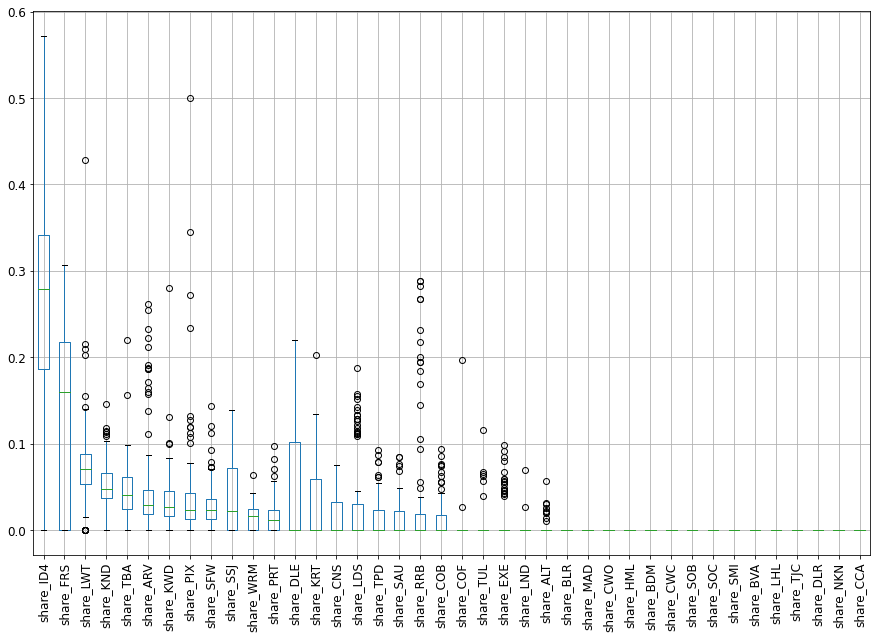

In [11]:
plt.figure(figsize=(15,10))
df_shares.boxplot()
dum = plt.xticks(rotation=90)

In [12]:
df_shares = df_shares.loc[:, df_shares.sum(axis=0) > 0]

1.0000000000000004 [3.55095801e-01 2.20253701e-01 9.57188303e-02 7.55148246e-02
 5.61396530e-02 4.15714744e-02 3.04225662e-02 2.51696255e-02
 1.66681235e-02 1.46296606e-02 1.18933649e-02 1.01840615e-02
 9.25942103e-03 7.51331141e-03 5.42055562e-03 5.19389932e-03
 4.50902270e-03 4.05428704e-03 2.77305059e-03 2.54710081e-03
 2.32023129e-03 1.74607383e-03 9.99637666e-04 4.01722183e-04
 9.49648756e-33]


Text(0, 0.5, 'Explained variance')

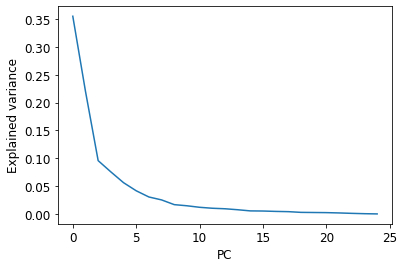

In [13]:
### pca on shares
from sklearn.decomposition import PCA

pca = PCA()
pca_fit = pca.fit_transform(df_shares)
print(sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('PC')
plt.ylabel('Explained variance')

In [14]:
pca_comps = pd.DataFrame(data = pca.components_, columns = ['pc' + str(i) for i in range(len(pca.components_))])

df_pca = pd.DataFrame(data = pca_fit, columns = ['pc' + str(i) for i in range(len(pca.components_))])
df_pca.describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
count,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,...,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02
mean,2.094760e-18,-1.309225e-17,2.356605e-18,4.844133e-18,-5.335093e-18,2.749373e-18,-5.760591e-18,-3.109410e-18,9.164577e-19,-9.164577e-19,...,-1.931107e-18,2.291144e-18,-7.855352e-19,3.436716e-18,-1.374687e-18,1.701993e-18,-1.996569e-18,2.250231e-19,-9.328230e-19,-8.607747e-19
std,1.507360e-01,1.187151e-01,7.826057e-02,6.951211e-02,5.993482e-02,5.157533e-02,4.412069e-02,4.013125e-02,3.265786e-02,3.059578e-02,...,1.823019e-02,1.698578e-02,1.610652e-02,1.332058e-02,1.276637e-02,1.218456e-02,1.057002e-02,7.997710e-03,5.069992e-03,2.463533e-17
min,-3.255520e-01,-2.003931e-01,-1.908554e-01,-1.316647e-01,-1.387601e-01,-1.770963e-01,-9.899099e-02,-1.177749e-01,-1.098022e-01,-8.811656e-02,...,-3.527076e-02,-3.873016e-02,-4.598227e-02,-2.740985e-02,-3.480405e-02,-3.822221e-02,-2.906640e-02,-1.540257e-02,-2.657902e-02,-5.275676e-17
25%,-8.874216e-02,-8.871338e-02,-3.635987e-02,-3.194245e-02,-4.066745e-02,-3.541668e-02,-2.819092e-02,-1.805605e-02,-1.671361e-02,-1.749380e-02,...,-9.536118e-03,-9.254442e-03,-9.758124e-03,-7.898624e-03,-5.526612e-03,-6.423061e-03,-7.756761e-03,-3.868468e-03,-1.681445e-03,-1.850537e-17
50%,2.732866e-02,-3.395622e-02,-1.521260e-02,-6.228952e-03,-5.901009e-03,3.716425e-03,-2.248412e-03,3.631947e-03,-1.601199e-03,1.581512e-03,...,-9.015432e-04,-9.356051e-04,1.003034e-03,-3.491719e-04,-8.783658e-04,-2.159236e-03,-6.378168e-04,-3.042302e-04,-4.321635e-04,-3.210165e-18
75%,1.051360e-01,1.240865e-01,7.925908e-03,1.815153e-02,3.696618e-02,3.309164e-02,2.451700e-02,1.848665e-02,1.968055e-02,1.738516e-02,...,7.320784e-03,7.831503e-03,8.716180e-03,8.089337e-03,5.313596e-03,7.814281e-03,6.488075e-03,3.017388e-03,1.281755e-03,1.792145e-17
max,3.371417e-01,2.297552e-01,2.530712e-01,4.306598e-01,1.561539e-01,1.842191e-01,1.532313e-01,1.573323e-01,1.405851e-01,1.444864e-01,...,1.331552e-01,6.367436e-02,4.868777e-02,4.955723e-02,3.505265e-02,4.063433e-02,3.051935e-02,5.297037e-02,2.927371e-02,5.918499e-17


Text(0, 0.5, 'PC magnitude')

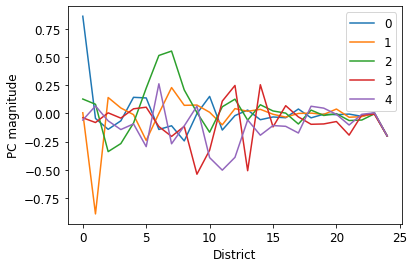

In [15]:
for i in range(5):
    plt.plot(pca_comps.iloc[:,i], label=i)
plt.legend()
plt.xlabel('District')
plt.ylabel('PC magnitude')

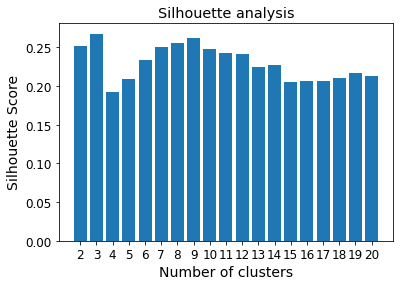

In [16]:
### knn, following Trevor's blog post https://waterprogramming.wordpress.com/2022/03/16/clustering-basics-and-a-demonstration-in-clustering-infrastructure-pathways/ 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_score

num_clust = list(range(2,21))
 
# Set up hierarchical clustering with different numbers of clusters
silhouette_scores = []
for n in num_clust:
    ac = AgglomerativeClustering(n_clusters = n)
 
    silhouette_scores.append(silhouette_score(df_shares, ac.fit_predict(df_shares)))

                                                   
plt.bar(num_clust, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Silhouette Score', fontsize = 14)
plt.xticks(num_clust)
plt.title("Silhouette analysis")
plt.show()

# choose number of clusters based on above
num_clusters = 5
 
# Initialize the hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters = num_clusters)
 
# Cluster the data
hierarchical.fit(df_shares)  
 
# Produce a array which specifies the cluster of each pathway
hierarchical_labels = hierarchical.fit_predict(df_shares)

df_shares['cluster'] = hierarchical_labels

In [17]:
df_shares

,share_ID4,share_FRS,share_LWT,share_KND,share_TBA,share_ARV,share_KWD,share_PIX,share_SFW,share_SSJ,...,share_TPD,share_SAU,share_RRB,share_COB,share_COF,share_TUL,share_EXE,share_LND,share_ALT,cluster
0,0.571796,0.000000,0.428204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1
1,0.000000,0.162621,0.035266,0.045454,0.080383,0.020303,0.000000,0.067815,0.023749,0.092684,...,0.078370,0.045101,0.000000,0.000000,0.0,0.0,0.056549,0.0,0.0,2
2,0.000000,0.128743,0.068479,0.055415,0.066720,0.012899,0.034620,0.012496,0.012476,0.019689,...,0.047215,0.036896,0.000000,0.074229,0.0,0.0,0.042725,0.0,0.0,2
3,0.000000,0.239795,0.073872,0.052151,0.219499,0.016686,0.024649,0.021522,0.112392,0.117665,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,2
4,0.000000,0.134375,0.063193,0.064813,0.032113,0.022640,0.026712,0.051280,0.013720,0.044796,...,0.054457,0.034120,0.000000,0.055809,0.0,0.0,0.044798,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.325010,0.188313,0.063528,0.103648,0.000000,0.018417,0.013990,0.045152,0.000000,0.000000,...,0.000000,0.000000,0.194941,0.000000,0.0,0.0,0.000000,0.0,0.0,4
102,0.310475,0.199802,0.049376,0.073374,0.027453,0.021637,0.046556,0.022901,0.053841,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,3
103,0.315123,0.231543,0.000000,0.087592,0.000000,0.000000,0.015864,0.071075,0.000000,0.000000,...,0.000000,0.000000,0.200734,0.014626,0.0,0.0,0.000000,0.0,0.0,4
104,0.408623,0.243185,0.046648,0.145962,0.000000,0.031313,0.041749,0.034411,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,4


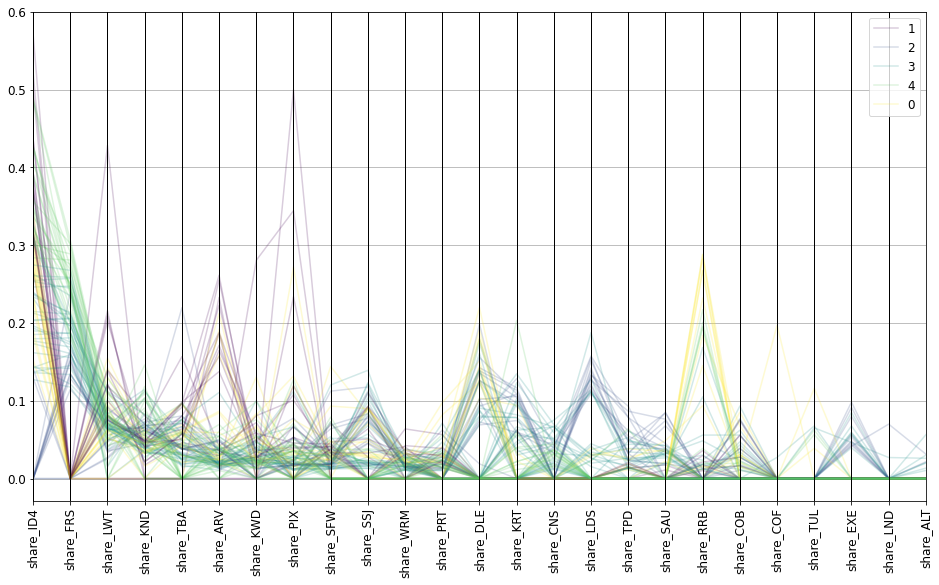

In [18]:
plt.figure(figsize=(16, 9))
pd.plotting.parallel_coordinates(df_shares, class_column='cluster', colormap='viridis', alpha=0.2)
dum = plt.xticks(rotation=90)

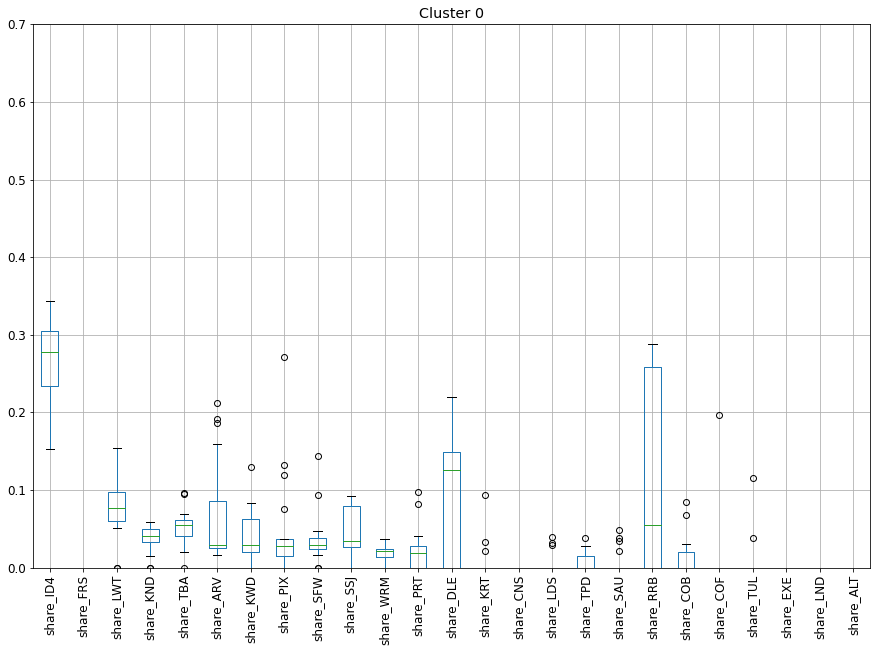

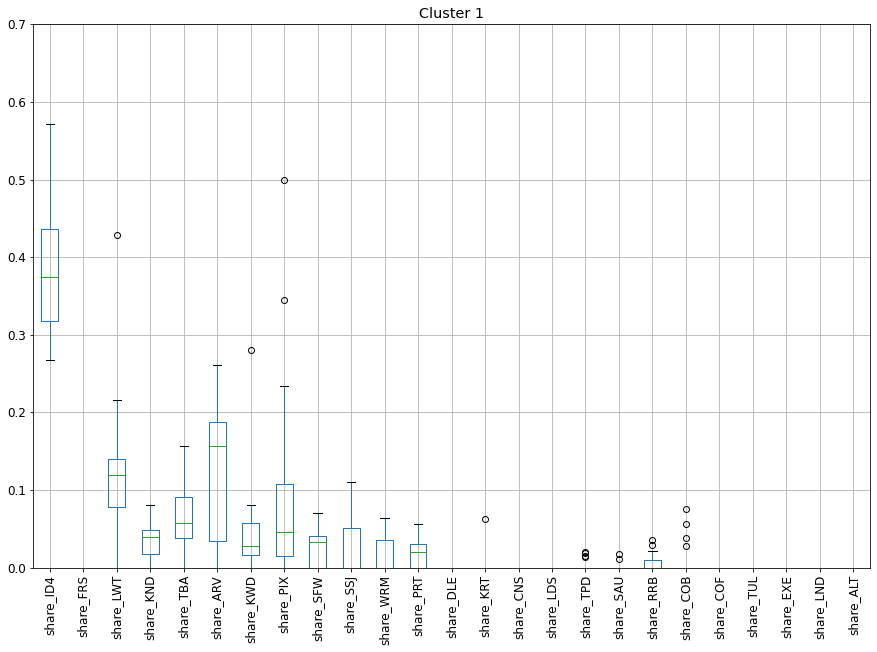

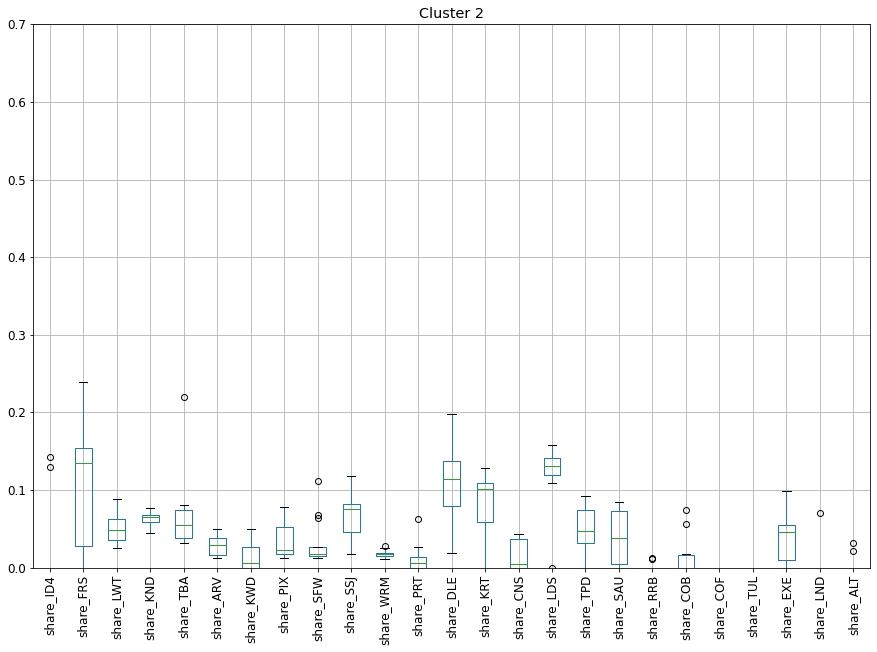

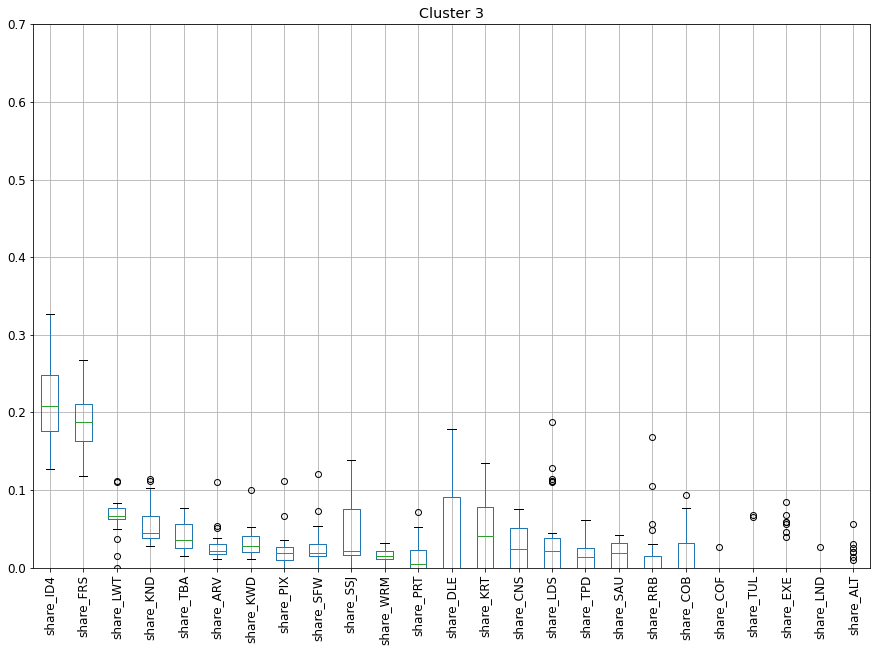

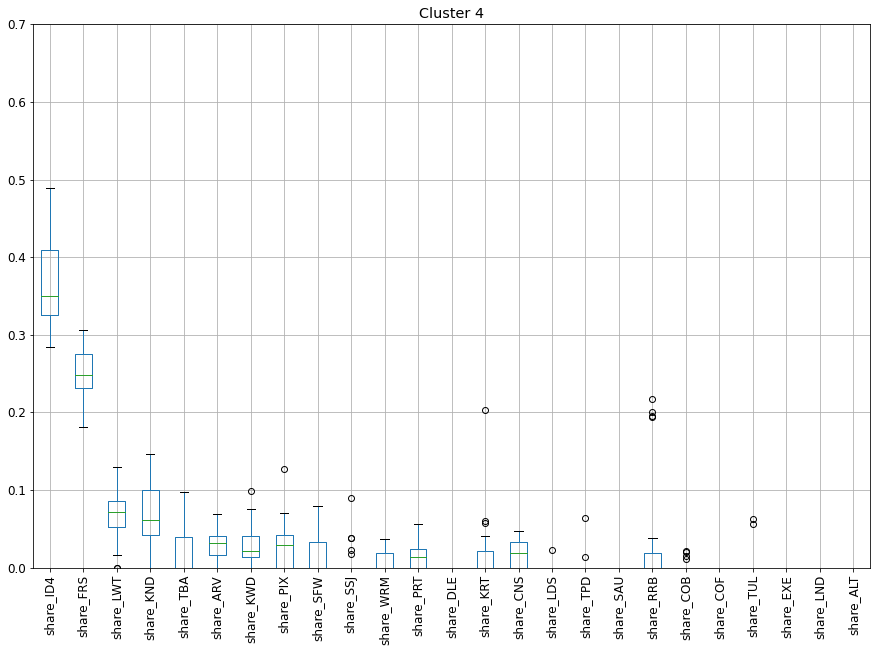

In [19]:
### cluster specific boxplots
for i in range(num_clusters):
    plt.figure(figsize=(15,10))
    df_shares.loc[df_shares['cluster'] == i,:].iloc[:,:-1].boxplot()
    dum = plt.xticks(rotation=90)
    plt.title(f'Cluster {i}')
    plt.ylim([0,0.7])

<AxesSubplot:>

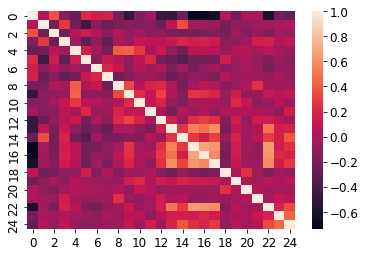

In [20]:
### correlation analysis
sns.heatmap(np.corrcoef(df_shares.iloc[:, :-1], rowvar=False))

In [21]:
### Interesting solutions to explore, from playing with overall_coarse_filt_clean in intereactive parallel coord plot

idxs = []
# solution maximizing CWG_P
idxs.append(df.loc[abs(df['obj0'] + 113.482) < 1e-3, :].index[0])
# solution maximizing AP_P 
idxs.append(df.loc[abs(df['obj0'] + 76.398) < 1e-3, :].index[0])
# solution maximizing CWG_NP
idxs.append(df.loc[abs(df['obj0'] + 63.376) < 1e-3, :].index[0])
# solution maximizing COG_P
idxs.append(df.loc[abs(df['obj0'] + 40.456) < 1e-3, :].index[0])
# solution maximizing N_P, COG_P as tie-breaker
idxs.append(df.loc[abs(df['obj0'] + 80.944) < 1e-3, :].index[0])
# compromise/brushed soln: COG_P < 200, CWG_NP < 0, then max AP_P
idxs.append(df.loc[abs(df['obj0'] + 86.674) < 1e-3, :].index[0])

df_hilite = df.iloc[idxs,:]
df_hilite

df['hilite'] = 0
df['hilite'].iloc[df_hilite.index] = 1
df['group'] = df['obj4']
df.to_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse_filt_hilite.csv', index=False)

df_obj = df.loc[:, ['obj0','obj1','obj2','obj3','obj4','hilite','group']]
df_obj.to_csv(f'../results/MOO_results_s2/overall_ref/overall_coarse_filt_hilite_objs.csv', index=False)

/home/alh/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
df_hilite

,dv,seed,project,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,...,share_CWC,share_MAD,share_SOC,share_SOB,share_CCA,obj0,obj1,obj2,obj3,obj4
103,2,2,3,0.231543,0.0,0.000000,0.015864,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-113.482375,-47.899578,25.157676,241.946920,-11.0
30,2,0,3,0.135133,0.0,0.000000,0.028039,0.04670,0.121129,0.000000,...,0.0,0.0,0.0,0.0,0.0,-76.398461,-69.859896,6.134480,443.358216,-18.0
91,2,2,2,0.256350,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-63.376445,-24.330992,-30.076886,281.025368,-5.0
9,1,1,2,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-40.456301,-19.161724,-1.011151,98.547125,-2.0
18,2,0,3,0.117640,0.0,0.065174,0.020932,0.04641,0.019729,0.027053,...,0.0,0.0,0.0,0.0,0.0,-80.944027,-54.544063,6.515788,424.626762,-21.0
40,2,0,3,0.000000,0.0,0.116043,0.029924,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-86.674176,-62.266306,-1.006533,172.877919,-12.0


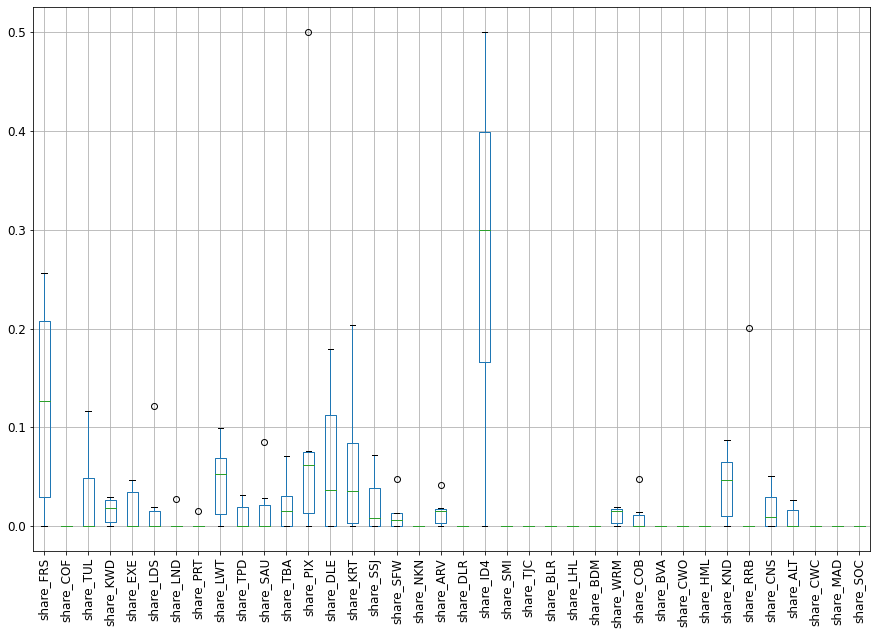

In [23]:
df_hilite_shares = df_hilite.iloc[:, 3:-7]

plt.figure(figsize=(15,10))
df_hilite_shares.boxplot()
dum = plt.xticks(rotation=90)

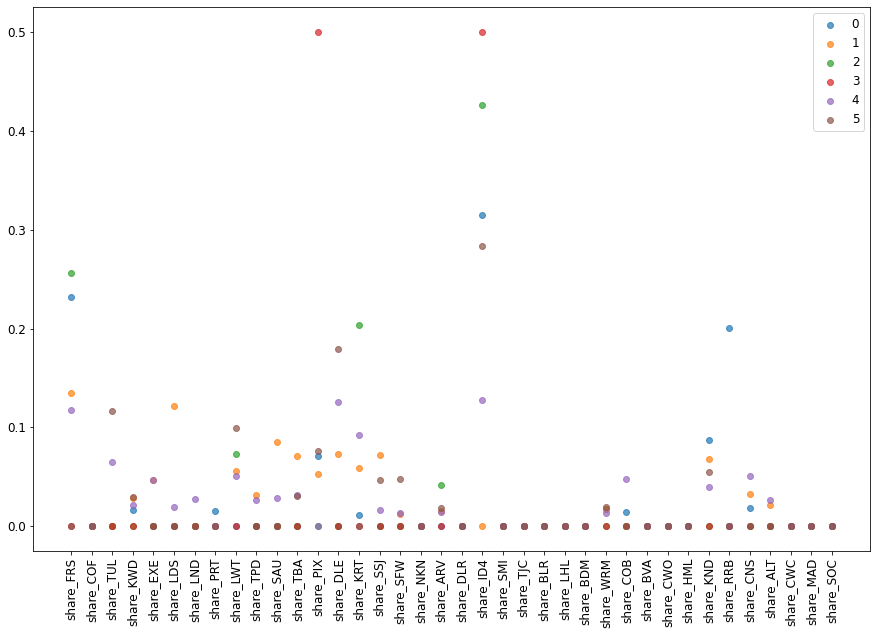

In [24]:
plt.figure(figsize=(15,10))
for r in range(df_hilite_shares.shape[0]):
    plt.scatter(np.arange(df_hilite_shares.shape[1]), df_hilite_shares.iloc[r,:], label=r, alpha=0.7)
dum = plt.xticks(np.arange(df_hilite_shares.shape[1]), df_hilite_shares.columns, rotation=90)
dum = plt.legend()

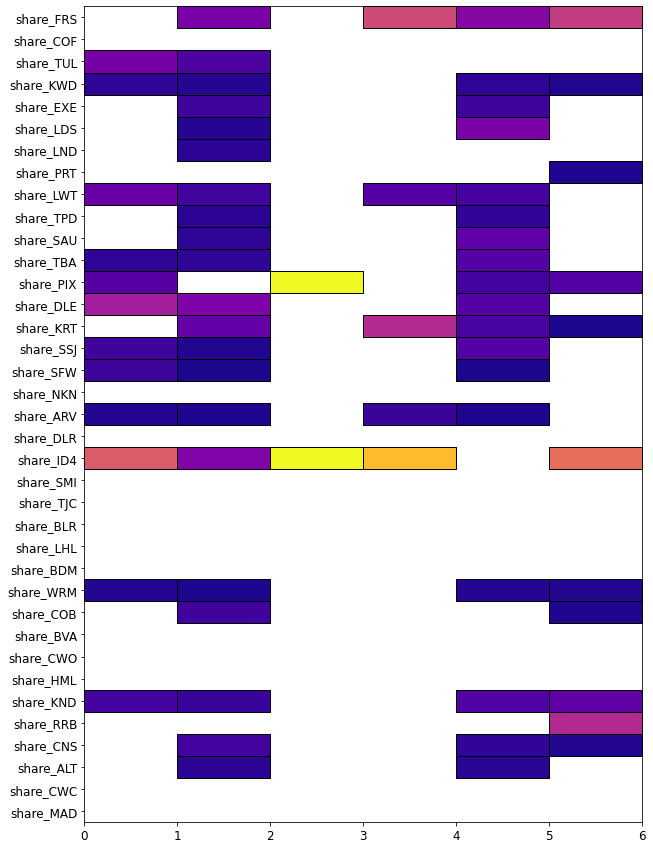

In [25]:
### patches plot, showing shares in different solutions
ndistricts = df_hilite_shares.shape[1] - 1
nsolns = df_hilite_shares.shape[0]
cmap = cm.get_cmap('plasma')
cnorm = Normalize(vmin=0, vmax=0.5)

fig, ax = plt.subplots(1, figsize=(10,15))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_hilite_shares.iloc[s, d]
        shareboxes = [Rectangle((nsolns - s - 1, ndistricts - d - 1), 1, 1)]
        color = cmap(cnorm(share))
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), df_hilite_shares.columns[:-1])

In [26]:
### BREAK
a++b

NameError: name 'a' is not defined

In [27]:
# ### sort df_shares by CWG_P
# df_shares = df_shares.iloc[df.sort_values('obj0').index, :].reset_index(drop=True)
# df = df.iloc[df.sort_values('obj0').index, :].reset_index(drop=True)
# df

### sort df_shares by N_P
df_shares = df_shares.iloc[df.sort_values(['obj4','obj0']).index, :].reset_index(drop=True)
df = df.iloc[df.sort_values(['obj4','obj0']).index, :].reset_index(drop=True)
df

,dv,seed,project,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,...,share_SOC,share_SOB,share_CCA,obj0,obj1,obj2,obj3,obj4,hilite,group
0,2,0,3,0.121493,0.0,0.000000,0.027479,0.055770,0.111855,0.000000,...,0.0,0.0,0.0,-93.241401,-61.281029,15.579309,454.785853,-21.0,0,-21.0
1,2,0,3,0.133689,0.0,0.000000,0.024080,0.067648,0.114386,0.000000,...,0.0,0.0,0.0,-92.292443,-60.590916,13.906228,468.380356,-21.0,0,-21.0
2,2,0,3,0.117640,0.0,0.065174,0.020932,0.046410,0.019729,0.027053,...,0.0,0.0,0.0,-80.944027,-54.544063,6.515788,424.626762,-21.0,1,-21.0
3,2,0,3,0.186571,0.0,0.000000,0.039692,0.000000,0.029057,0.000000,...,0.0,0.0,0.0,-94.619493,-62.695564,14.127067,348.768826,-19.0,0,-19.0
4,2,1,3,0.187160,0.0,0.000000,0.018921,0.000000,0.187781,0.000000,...,0.0,0.0,0.0,-98.813784,-62.273492,15.586005,355.250283,-18.0,0,-18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,1,3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-83.104152,-37.633041,7.185615,104.825559,-4.0,0,-4.0
102,1,0,3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-68.520922,-42.392053,-9.555876,112.048170,-4.0,0,-4.0
103,1,1,3,0.000000,0.0,0.000000,0.280562,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-80.319074,-38.475368,-0.336993,119.320340,-3.0,0,-3.0
104,1,1,3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,-57.071753,-10.023146,-22.501985,132.823951,-2.0,0,-2.0


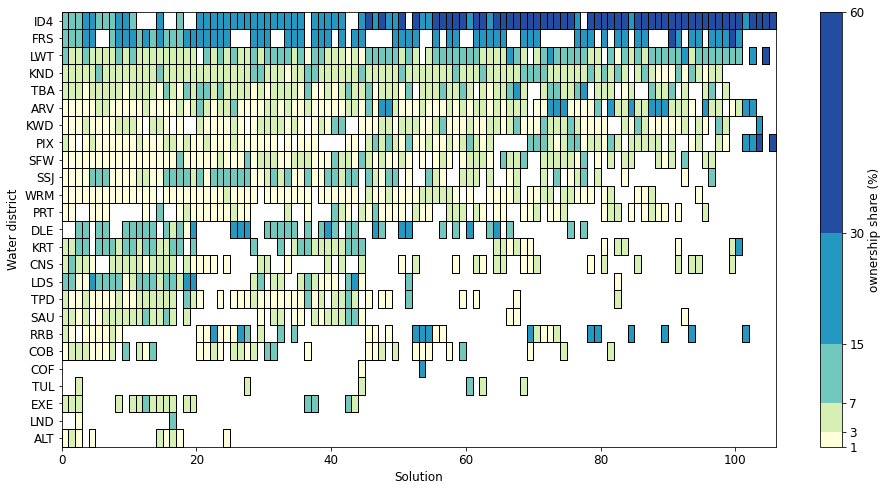

In [44]:
### patches plot, showing shares in different solutions. use custom scale
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap_plasma = cm.get_cmap('YlGnBu')
oldcolors = cmap_plasma(np.linspace(0, 1, 6))
newcolors = cmap_plasma(np.linspace(0, 1, 2560))
breaks = [int(2560 * b) for b in [0.,0.03, 0.07, 0.15, 0.3, 1]]
for i , b in enumerate(breaks[:-1]):
    newcolors[b:breaks[i+1]] = oldcolors[i]
cmap_class = ListedColormap(newcolors)

# cnorm = Normalize(vmin=0, vmax=0.64)
sm = cm.ScalarMappable(cmap=cmap_class)

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        color = cmap_class(share)
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
ax.set_xlabel('Solution')
ax.set_ylabel('Water district')
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), [s.split('_')[1] for s in df_shares.columns[:-1]])
cb = plt.colorbar(sm, ax=ax, label='ownership share (%)', ticks=[0.01,0.03, 0.07, 0.15, 0.3,0.6])
_ = cb.ax.set_yticklabels([1,3,7,15,30,60])
_ = cb.ax.set_ylim([0.01,0.6])


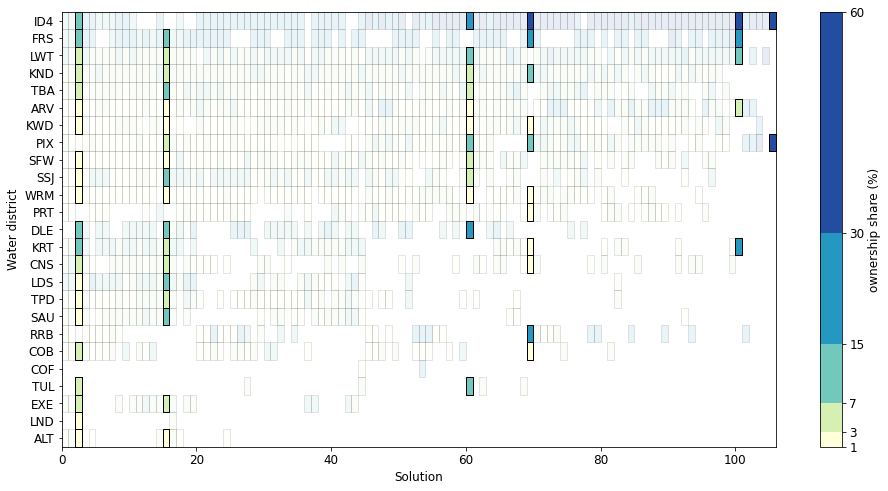

In [45]:
### patches plot, showing shares in different solutions. use custom scale
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap_plasma = cm.get_cmap('YlGnBu')
oldcolors = cmap_plasma(np.linspace(0, 1, 6))
newcolors = cmap_plasma(np.linspace(0, 1, 100))
breaks = [int(100 * b) for b in [0.,0.03, 0.07, 0.15, 0.3, 1]]
for i , b in enumerate(breaks[:-1]):
    newcolors[b:breaks[i+1]] = oldcolors[i]
cmap_class = ListedColormap(newcolors)

# cnorm = Normalize(vmin=0, vmax=0.64)
sm = cm.ScalarMappable(cmap=cmap_class)

brush = df['hilite']

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        color = cmap_class(share)
        if share == 0.:
            alpha = 0
        else:
            if brush[s]:
                alpha = 1
            else:
                alpha = 0.1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
ax.set_xlabel('Solution')
ax.set_ylabel('Water district')
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), [s.split('_')[1] for s in df_shares.columns[:-1]])
cb = plt.colorbar(sm, ax=ax, label='ownership share (%)', ticks=[0.01,0.03, 0.07, 0.15, 0.3,0.6])
_ = cb.ax.set_yticklabels([1,3,7,15,30,60])
_ = cb.ax.set_ylim([0.01,0.6])


In [30]:
df_hilite

,dv,seed,project,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,...,share_CWC,share_MAD,share_SOC,share_SOB,share_CCA,obj0,obj1,obj2,obj3,obj4
103,2,2,3,0.231543,0.0,0.000000,0.015864,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-113.482375,-47.899578,25.157676,241.946920,-11.0
30,2,0,3,0.135133,0.0,0.000000,0.028039,0.04670,0.121129,0.000000,...,0.0,0.0,0.0,0.0,0.0,-76.398461,-69.859896,6.134480,443.358216,-18.0
91,2,2,2,0.256350,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-63.376445,-24.330992,-30.076886,281.025368,-5.0
9,1,1,2,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-40.456301,-19.161724,-1.011151,98.547125,-2.0
18,2,0,3,0.117640,0.0,0.065174,0.020932,0.04641,0.019729,0.027053,...,0.0,0.0,0.0,0.0,0.0,-80.944027,-54.544063,6.515788,424.626762,-21.0
40,2,0,3,0.000000,0.0,0.116043,0.029924,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-86.674176,-62.266306,-1.006533,172.877919,-12.0


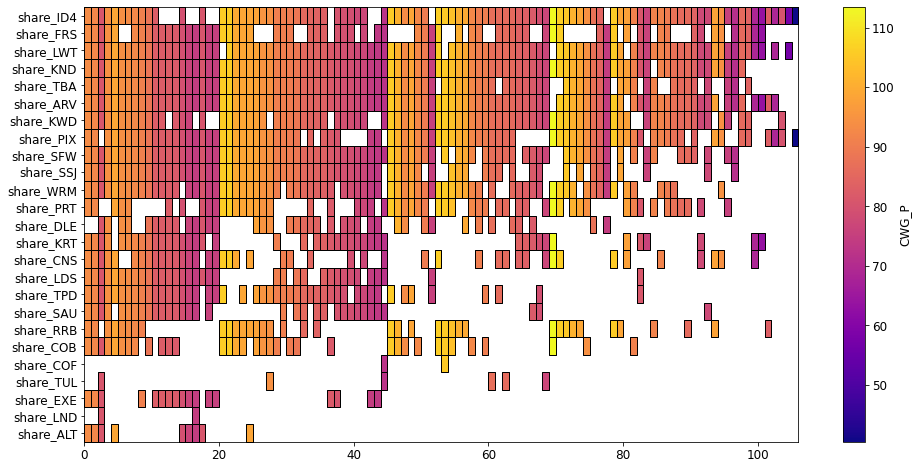

In [31]:
### patches plot, showing CWG_P
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap = cm.get_cmap('plasma')
cnorm = Normalize(vmin=-df['obj0'].max(), vmax=-df['obj0'].min())
sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        minobj = -df['obj0'].iloc[s]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        color = cmap(cnorm(minobj))
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), df_shares.columns[:-1])
_ = plt.colorbar(sm, ax=ax, label='CWG_P')

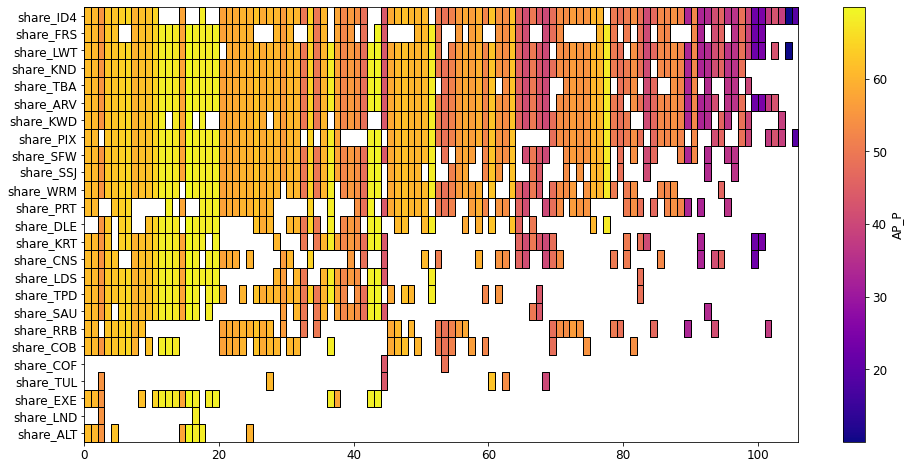

In [32]:
### patches plot, showing AP_P
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap = cm.get_cmap('plasma')
cnorm = Normalize(vmin=-df['obj1'].max(), vmax=-df['obj1'].min())
sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        minobj = -df['obj1'].iloc[s]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        color = cmap(cnorm(minobj))
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), df_shares.columns[:-1])
_ = plt.colorbar(sm, ax=ax, label='AP_P')

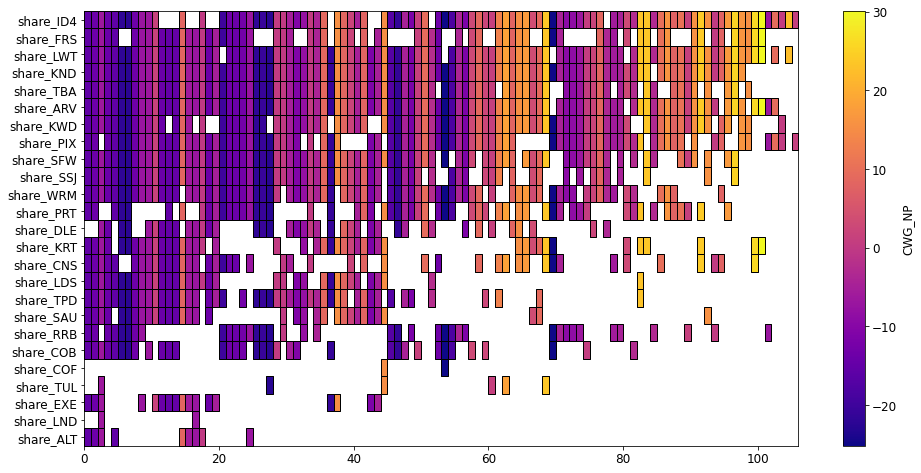

In [33]:
### patches plot, showing CWG_NP
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap = cm.get_cmap('plasma')
cnorm = Normalize(vmin=-df['obj2'].max(), vmax=-df['obj2'].min())
sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        minobj = -df['obj2'].iloc[s]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        color = cmap(cnorm(minobj))
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), df_shares.columns[:-1])
_ = plt.colorbar(sm, ax=ax, label='CWG_NP')

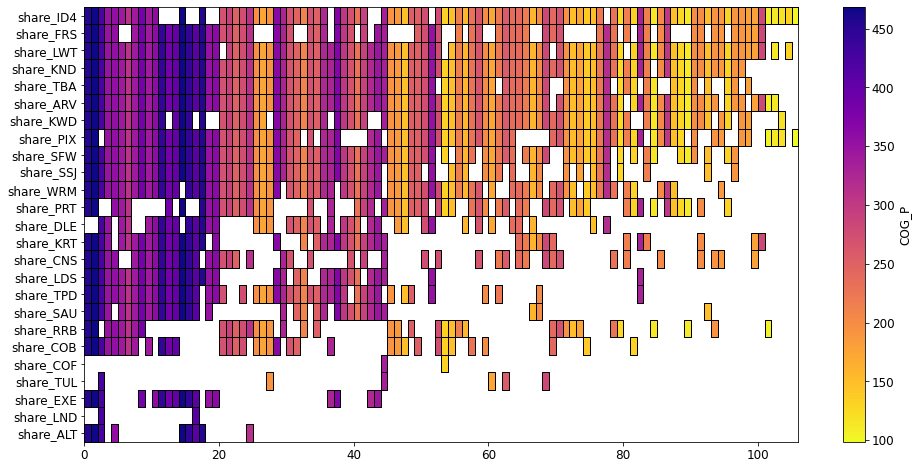

In [34]:
### patches plot, showing COG_P
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap = cm.get_cmap('plasma_r')
cnorm = Normalize(vmin=df['obj3'].min(), vmax=df['obj3'].max())
sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        minobj = df['obj3'].iloc[s]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        color = cmap(cnorm(minobj))
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), df_shares.columns[:-1])
_ = plt.colorbar(sm, ax=ax, label='COG_P')

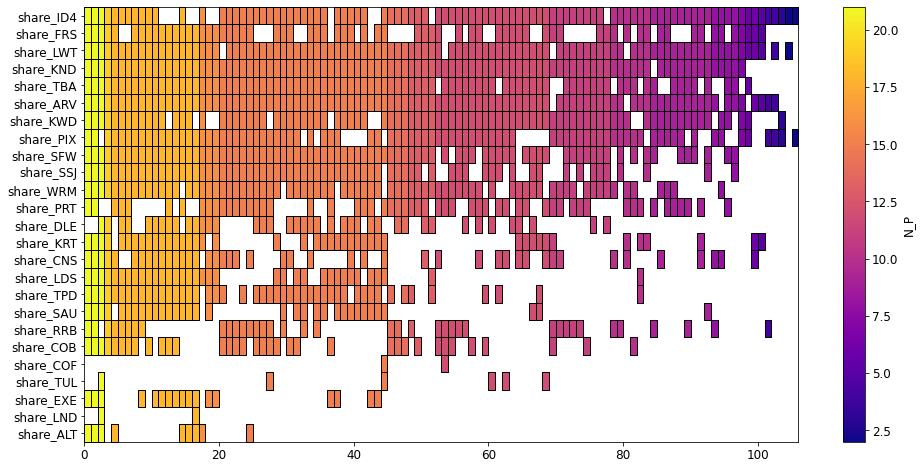

In [35]:
### patches plot, showing N_P
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap = cm.get_cmap('plasma')
cnorm = Normalize(vmin=-df['obj4'].max(), vmax=-df['obj4'].min())
sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        minobj = -df['obj4'].iloc[s]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        color = cmap(cnorm(minobj))
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), df_shares.columns[:-1])
_ = plt.colorbar(sm, ax=ax, label='N_P')

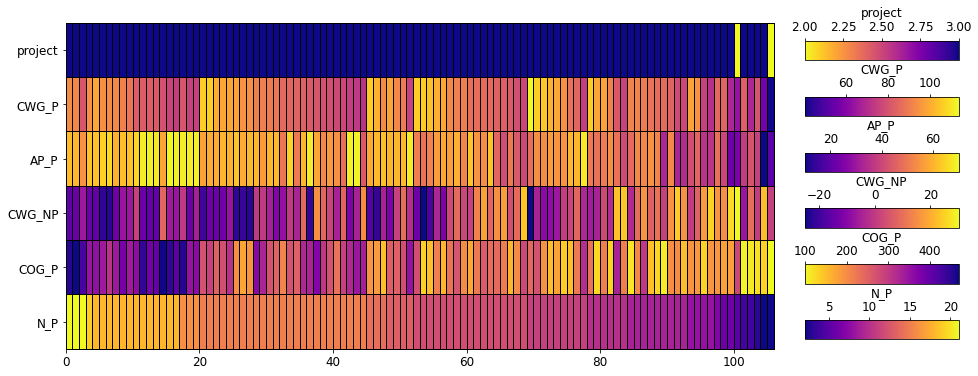

In [36]:
### plot objectives as patches
cols = ['project','obj0','obj1','obj2','obj3','obj4']
col_labels = ['project', 'CWG_P', 'AP_P', 'CWG_NP', 'COG_P', 'N_P']
ncols = len(cols)
nsolns = df_shares.shape[0]

fig, axd = plt.subplot_mosaic([['main','main','main','main','cb0'],
                              ['main','main','main','main','cb1'],
                              ['main','main','main','main','cb2'],
                              ['main','main','main','main','cb3'],
                              ['main','main','main','main','cb4'],
                              ['main','main','main','main','cb5']], figsize=(16,6))
shareboxes = []
colors = []
for c in range(ncols):
    col = cols[c]
    if col in ['project','obj3']:
        cnorm = Normalize(vmin=df[col].min(), vmax=df[col].max())
    else:
        cnorm = Normalize(vmin=-df[col].max(), vmax=-df[col].min())

    for s in range(nsolns):
        if col in ['project','obj3']:
            val = df[cols[c]].iloc[s]
            cmap = cm.get_cmap('plasma_r')
        else:
            val = -df[cols[c]].iloc[s]
            cmap = cm.get_cmap('plasma')


        shareboxes = [Rectangle((s, ncols - c - 1), 1, 1)]
        color = cmap(cnorm(val))
        alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        axd['main'].add_collection(pc)
    
    ### add subplot colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)
    _ = plt.colorbar(sm, ax=axd['cb'+str(c)], label=col_labels[c], orientation = 'horizontal', location='top', aspect=8, fraction=0.8)
    axd['cb'+str(c)].set_axis_off()
    
axd['main'].set_xlim([0,nsolns])
axd['main'].set_ylim([0,ncols])
_ = axd['main'].set_yticks(np.arange(ncols - 0.5, 0, -1), col_labels)

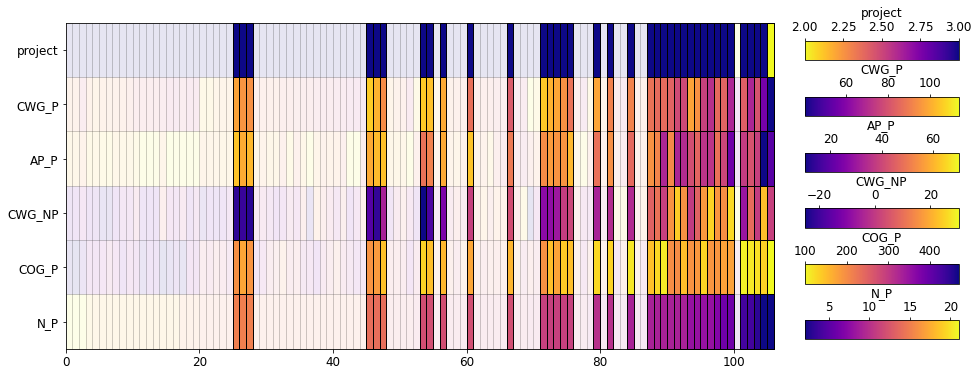

In [37]:
### plot objectives as patches, with brushing
cols = ['project','obj0','obj1','obj2','obj3','obj4']
col_labels = ['project', 'CWG_P', 'AP_P', 'CWG_NP', 'COG_P', 'N_P']
ncols = len(cols)
nsolns = df_shares.shape[0]

# brush = np.logical_and(df['obj3'] < 250, df['obj2'] < 0)
brush = df['obj3'] < 200

fig, axd = plt.subplot_mosaic([['main','main','main','main','cb0'],
                              ['main','main','main','main','cb1'],
                              ['main','main','main','main','cb2'],
                              ['main','main','main','main','cb3'],
                              ['main','main','main','main','cb4'],
                              ['main','main','main','main','cb5']], figsize=(16,6))
shareboxes = []
colors = []
for c in range(ncols):
    col = cols[c]
    if col in ['project','obj3']:
        cnorm = Normalize(vmin=df[col].min(), vmax=df[col].max())
    else:
        cnorm = Normalize(vmin=-df[col].max(), vmax=-df[col].min())

    for s in range(nsolns):
        if col in ['project','obj3']:
            val = df[cols[c]].iloc[s]
            cmap = cm.get_cmap('plasma_r')
        else:
            val = -df[cols[c]].iloc[s]
            cmap = cm.get_cmap('plasma')
        color = cmap(cnorm(val))

        if brush[s]:
            alpha = 1
#             if col in ['project','obj3']:
#                 val = df[cols[c]].iloc[s]
#             else:
#                 val = -df[cols[c]].iloc[s]
#             color = cmap(cnorm(val))
        else:
            alpha = 0.1
#             color = '0.1'
        
        shareboxes = [Rectangle((s, ncols - c - 1), 1, 1)]

        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        axd['main'].add_collection(pc)
    
    ### add subplot colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)
    _ = plt.colorbar(sm, ax=axd['cb'+str(c)], label=col_labels[c], orientation = 'horizontal', location='top', aspect=8, fraction=0.8)
    axd['cb'+str(c)].set_axis_off()
    
axd['main'].set_xlim([0,nsolns])
axd['main'].set_ylim([0,ncols])
_ = axd['main'].set_yticks(np.arange(ncols - 0.5, 0, -1), col_labels)

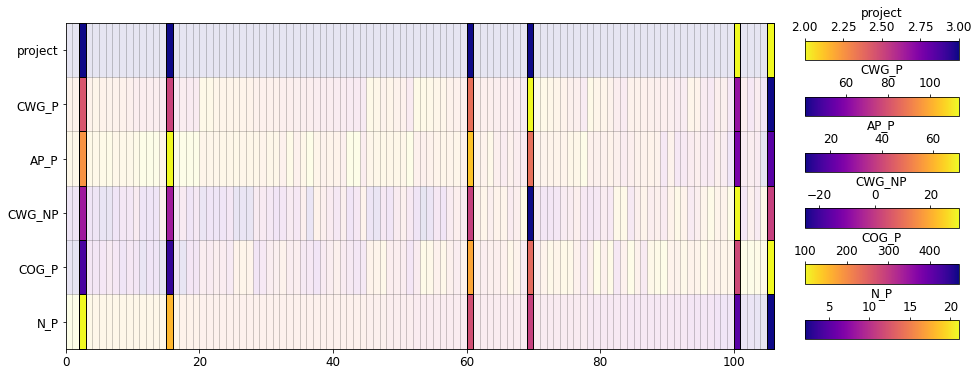

In [38]:
### plot objectives as patches, with brushing by hilite
cols = ['project','obj0','obj1','obj2','obj3','obj4']
col_labels = ['project', 'CWG_P', 'AP_P', 'CWG_NP', 'COG_P', 'N_P']
ncols = len(cols)
nsolns = df_shares.shape[0]

# brush = np.logical_and(df['obj3'] < 250, df['obj2'] < 0)
brush = df['hilite'] 

fig, axd = plt.subplot_mosaic([['main','main','main','main','cb0'],
                              ['main','main','main','main','cb1'],
                              ['main','main','main','main','cb2'],
                              ['main','main','main','main','cb3'],
                              ['main','main','main','main','cb4'],
                              ['main','main','main','main','cb5']], figsize=(16,6))
shareboxes = []
colors = []
for c in range(ncols):
    col = cols[c]
    if col in ['project','obj3']:
        cnorm = Normalize(vmin=df[col].min(), vmax=df[col].max())
    else:
        cnorm = Normalize(vmin=-df[col].max(), vmax=-df[col].min())

    for s in range(nsolns):
        if col in ['project','obj3']:
            val = df[cols[c]].iloc[s]
            cmap = cm.get_cmap('plasma_r')
        else:
            val = -df[cols[c]].iloc[s]
            cmap = cm.get_cmap('plasma')
        color = cmap(cnorm(val))

        if brush[s]:
            alpha = 1
#             if col in ['project','obj3']:
#                 val = df[cols[c]].iloc[s]
#             else:
#                 val = -df[cols[c]].iloc[s]
#             color = cmap(cnorm(val))
        else:
            alpha = 0.1
#             color = '0.1'
        
        shareboxes = [Rectangle((s, ncols - c - 1), 1, 1)]

        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        axd['main'].add_collection(pc)
    
    ### add subplot colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=cnorm)
    _ = plt.colorbar(sm, ax=axd['cb'+str(c)], label=col_labels[c], orientation = 'horizontal', location='top', aspect=8, fraction=0.8)
    axd['cb'+str(c)].set_axis_off()
    
axd['main'].set_xlim([0,nsolns])
axd['main'].set_ylim([0,ncols])
_ = axd['main'].set_yticks(np.arange(ncols - 0.5, 0, -1), col_labels)

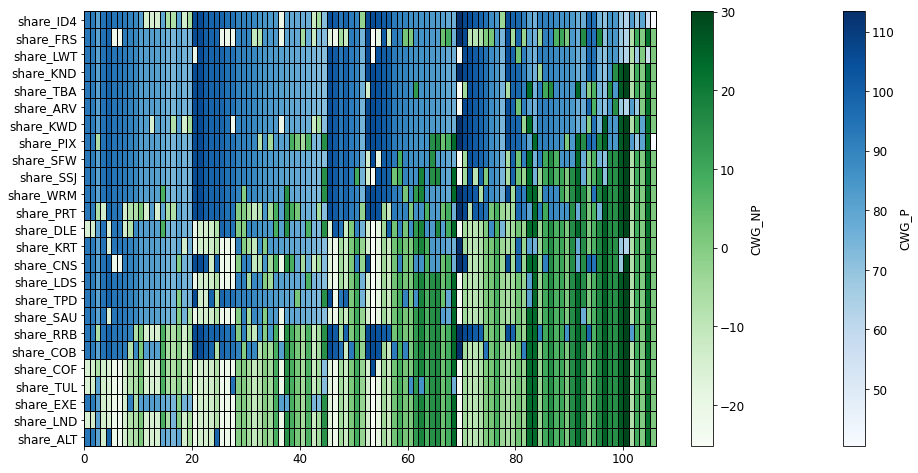

In [39]:
### patches plot, showing CWG_P for partners, CWG_NP for non-partners
ndistricts = df_shares.shape[1] - 1
nsolns = df_shares.shape[0]
cmap_P = cm.get_cmap('Blues')
cnorm_P = Normalize(vmin=-df['obj0'].max(), vmax=-df['obj0'].min())
sm_P = cm.ScalarMappable(cmap=cmap_P, norm=cnorm_P)
cmap_NP = cm.get_cmap('Greens')
cnorm_NP = Normalize(vmin=-df['obj2'].max(), vmax=-df['obj2'].min())
sm_NP = cm.ScalarMappable(cmap=cmap_NP, norm=cnorm_NP)

fig, ax = plt.subplots(1, figsize=(16,8))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
        if share == 0.:
            minobj = -df['obj2'].iloc[s]
            color = cmap_NP(cnorm_NP(minobj))
            alpha = 1
        else:
            minobj = -df['obj0'].iloc[s]
            color = cmap_P(cnorm_P(minobj))            
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        ax.add_collection(pc)
ax.set_xlim([0,nsolns])
ax.set_ylim([0,ndistricts])
_ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), df_shares.columns[:-1])
_ = plt.colorbar(sm_P, ax=ax, label='CWG_P')
_ = plt.colorbar(sm_NP, ax=ax, label='CWG_NP')